Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394871 entries, 0 to 394870
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        394871 non-null  int64  
 1   49.94357    394871 non-null  float64
 2   21.47114    394871 non-null  float64
 3   73.0775     394871 non-null  float64
 4   8.74861     394871 non-null  float64
 5   -17.40628   394871 non-null  float64
 6   -13.09905   394871 non-null  float64
 7   -25.01202   394871 non-null  float64
 8   -12.23257   394871 non-null  float64
 9   7.83089     394871 non-null  float64
 10  -2.46783    394871 non-null  float64
 11  3.32136     394871 non-null  float64
 12  -2.31521    394871 non-null  float64
 13  10.20556    394871 non-null  float64
 14  611.10913   394871 non-null  float64
 15  951.0896    394871 non-null  float64
 16  698.11428   394871 non-null  float64
 17  408.98485   394871 non-null  float64
 18  383.70912   394871 non-

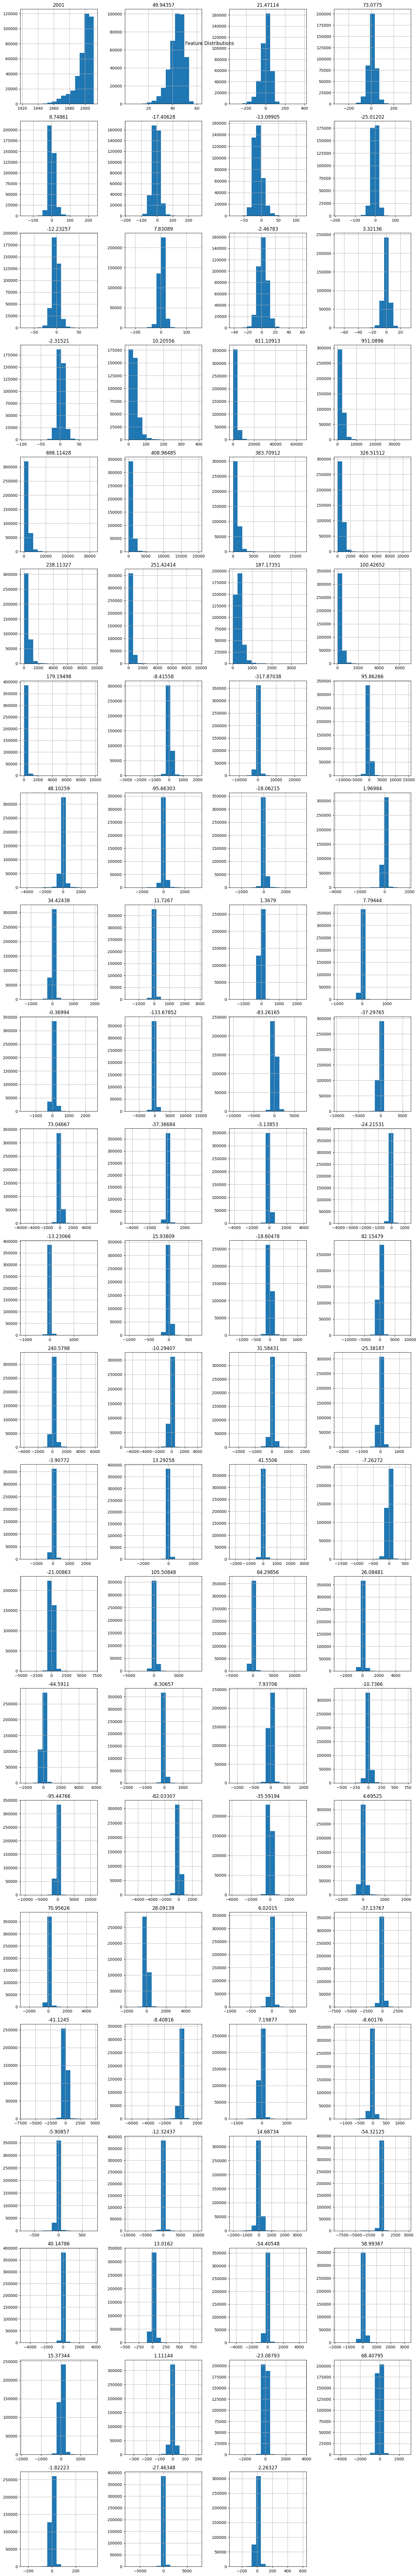

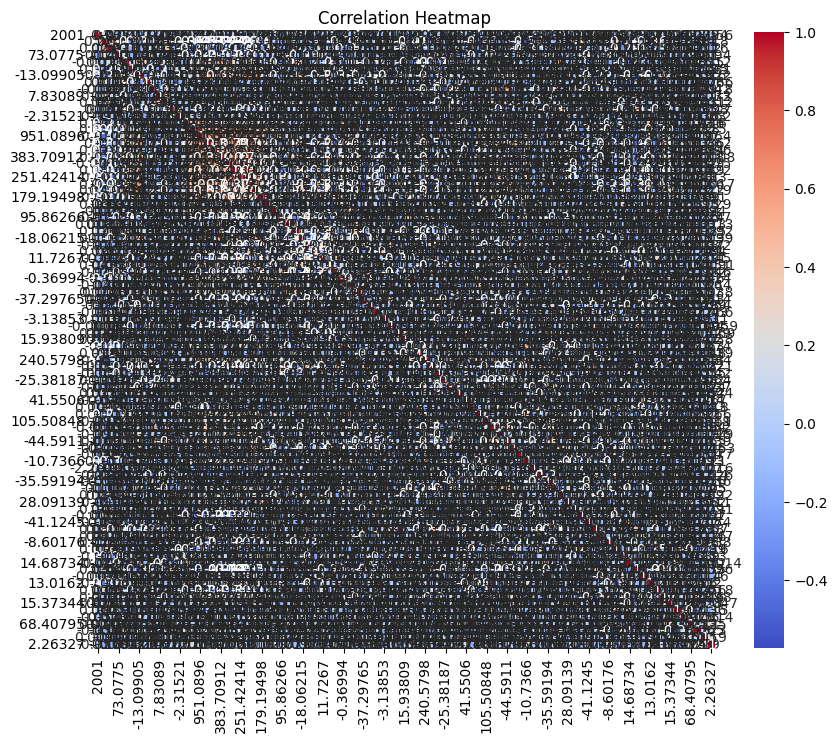

In [1]:
# Import necessary libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('RegresiUTSTelkom.csv')  # Ensure the file path is correct in Google Colab

# Display basic information
print("Dataset Information:")
print(data.info())

print("\nDataset Description:")
print(data.describe())

# Calculate the number of rows and columns for the layout
num_cols = data.shape[1]  # Get the number of columns
num_rows = (num_cols + 3) // 4  # Calculate rows, ensuring enough space (+3 to round up)


# Plotting distributions of each feature
# Adjust the layout to accommodate all columns
data.hist(bins=15, figsize=(15, 4 * num_rows), layout=(num_rows, 4))
plt.suptitle("Feature Distributions")
plt.tight_layout()  # Adjust subplot params for a tight layout
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [2]:
# Import necessary libraries for data processing, pipelines, models, and metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Load your dataset
data = pd.read_csv('RegresiUTSTelkom.csv')  # Ensure file path is correct

# Split the data into features and target
print("Column names in the dataset:", data.columns)
X = data.drop('2001', axis=1)  # Replace '2001' with the actual target column name if necessary
y = data['2001']  # Target variable

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model pipelines
poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regressor', DecisionTreeRegressor())
])

dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor())
])

print("Pipelines created successfully.")


Column names in the dataset: Index(['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628',
       '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136',
       '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428',
       '408.98485', '383.70912', '326.51512', '238.11327', '251.42414',
       '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038',
       '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438',
       '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165',
       '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531',
       '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798',
       '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506',
       '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481',
       '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307',
       '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767',

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define pipeline with imputer for Polynomial Regression
poly_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing the mean
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regressor', DecisionTreeRegressor())
])

# Polynomial Regression Hyperparameter Tuning
poly_params = {
    'poly_features__degree': [2],  # Only degree 2
    'regressor__max_depth': [None, 10]
}

poly_search = RandomizedSearchCV(
    poly_pipeline,
    param_distributions=poly_params,
    n_iter=2,  # Match the total space of parameters
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    verbose=2,
    random_state=42
)

# Fit the pipeline on the training data sample
poly_search.fit(X_train_sample, y_train_sample)

# Store results
results['Polynomial Regression'] = {
    "Best Parameters": poly_search.best_params_,
    "Evaluation": evaluate_model(poly_search.best_estimator_, X_test, y_test)
}

# Print results
print("Best Polynomial Regression Parameters:", results['Polynomial Regression']['Best Parameters'])
print("Evaluation Metrics:", results['Polynomial Regression']['Evaluation'])


Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END .poly_features__degree=2, regressor__max_depth=None; total time= 5.3min
[CV] END .poly_features__degree=2, regressor__max_depth=None; total time= 5.4min
[CV] END ...poly_features__degree=2, regressor__max_depth=10; total time= 3.0min
[CV] END ...poly_features__degree=2, regressor__max_depth=10; total time= 3.0min
Best Polynomial Regression Parameters: {'regressor__max_depth': 10, 'poly_features__degree': 2}
Evaluation Metrics: {'Mean Squared Error': 112.8347018343497, 'Mean Absolute Error': 7.273830326833338, 'R2 Score': 0.06401360580195481}


In [9]:
from sklearn.impute import SimpleImputer

# Update k-NN pipeline with imputer
knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing the mean
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])

In [10]:
# k-Nearest Neighbors Hyperparameter Tuning
knn_params = {
    'regressor__n_neighbors': [3, 5, 7],
    'regressor__weights': ['uniform', 'distance']
}
knn_search = RandomizedSearchCV(
    knn_pipeline,
    param_distributions=knn_params,
    n_iter=5,
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    verbose=2,
    random_state=42
)
knn_search.fit(X_train_sample, y_train_sample)
results['k-Nearest Neighbors'] = {
    "Best Parameters": knn_search.best_params_,
    "Evaluation": evaluate_model(knn_search.best_estimator_, X_test, y_test)
}

# XGBoost Hyperparameter Tuning
xgb_params = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [3, 6, 10],
    'regressor__learning_rate': [0.01, 0.1, 0.2]
}
xgb_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=xgb_params,
    n_iter=5,
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    verbose=2,
    random_state=42
)
xgb_search.fit(X_train_sample, y_train_sample)
results['XGBoost'] = {
    "Best Parameters": xgb_search.best_params_,
    "Evaluation": evaluate_model(xgb_search.best_estimator_, X_test, y_test)
}

# Display the results for each model
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print("Best Parameters:", result["Best Parameters"])
    print("Evaluation Metrics:")
    for metric, value in result["Evaluation"].items():
        print(f" - {metric}: {value}")


Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END regressor__n_neighbors=3, regressor__weights=uniform; total time=  10.9s
[CV] END regressor__n_neighbors=3, regressor__weights=uniform; total time=   9.8s
[CV] END regressor__n_neighbors=3, regressor__weights=distance; total time=   7.6s
[CV] END regressor__n_neighbors=3, regressor__weights=distance; total time=   9.9s
[CV] END regressor__n_neighbors=7, regressor__weights=distance; total time=   7.7s
[CV] END regressor__n_neighbors=7, regressor__weights=distance; total time=   9.7s
[CV] END regressor__n_neighbors=5, regressor__weights=uniform; total time=   9.2s
[CV] END regressor__n_neighbors=5, regressor__weights=uniform; total time=   8.2s
[CV] END regressor__n_neighbors=7, regressor__weights=uniform; total time=   9.7s
[CV] END regressor__n_neighbors=7, regressor__weights=uniform; total time=   7.6s
Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END regressor__learning_rate=0.01, regressor__max_d